In [1]:
%matplotlib inline  

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
agent_list       = []
time_stamp_list  = []
iteration_list   = []
policy_loss_list = []
value_loss_list  = []

data = []
ctr = 0
with open("./PongI2A_loss.txt") as f:
    
    lines = f.readlines()
    for line in lines:

        ctr += 1
        lines_split = line.split()
        
        agent = lines_split[1]
        time_stamp = " ".join(lines_split[3:5])
        iteration = int(lines_split[6])
        policy_loss = float(lines_split[8])
        value_loss = float(lines_split[10])
        
        data.append((ctr, time_stamp, agent, iteration, policy_loss, value_loss))
        agent_list.append(agent)
        time_stamp_list.append(time_stamp)
        iteration_list.append(iteration)
        policy_loss_list.append(policy_loss)
        value_loss_list.append(value_loss)
        

In [3]:
df = pd.DataFrame(
        data=data,
        columns=['index', 'time_stamp', 'agent', 'iteration', 'policy_loss', 'value_loss']
)

df['policy_loss_smooth'] = df['policy_loss'].rolling(15000).mean() * -1
df['value_loss_smooth'] = df['value_loss'].rolling(15000).mean()

df.dropna(axis=0, how='any', inplace=True)

In [4]:
df.head()

,index,time_stamp,agent,iteration,policy_loss,value_loss,policy_loss_smooth,value_loss_smooth
14999,15000,2018-01-31 16:04:51,6,1244,6.724466,0.448484,0.413412,0.667013
15000,15001,2018-01-31 16:04:51,4,1245,-22.069683,5.296908,0.414796,0.667362
15001,15002,2018-01-31 16:04:54,2,1247,-1.091254,0.031056,0.414993,0.667359
15002,15003,2018-01-31 16:04:54,5,1244,-6.681820,0.516153,0.415537,0.667389
15003,15004,2018-01-31 16:04:57,11,1248,-2.993640,0.094385,0.415879,0.667390


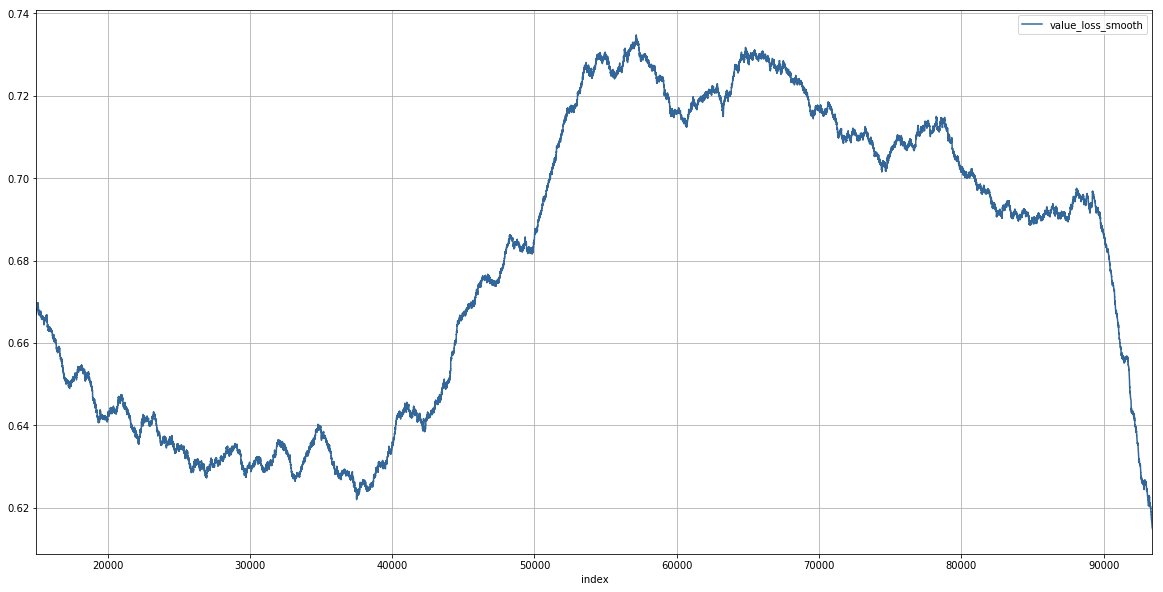

In [22]:
df.plot(x='index', y='value_loss_smooth',  figsize=(20, 10), color='#336699', grid=True)
plt.savefig("value_loss_smooth.svg")

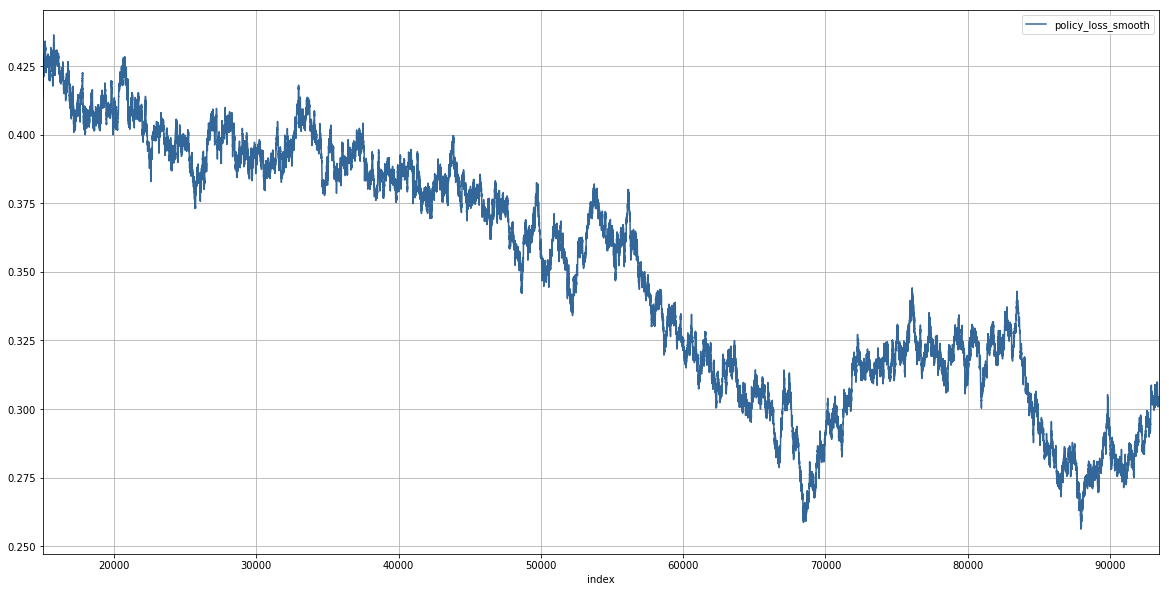

In [23]:
df.plot(x='index', y='policy_loss_smooth', figsize=(20, 10), color='#336699', grid=True)
plt.savefig("policy_loss_smooth.svg")

In [2]:


data_ep = []
ctr = 0
with open("./reward_from_start_till_end.txt") as f:
    
    lines = f.readlines()
    for line in lines:

        ctr += 1
        lines_split = line.split()
        
        agent = lines_split[1]
        time_stamp = " ".join(lines_split[1:4])
        episode_length = int(lines_split[4])
        reward = float(lines_split[6])
                
        data_ep.append((ctr, time_stamp, episode_length, reward))
        

In [3]:
df_episodes = pd.DataFrame(
        data=data_ep,
        columns=['index', 'time_stamp', 'episode_length', 'reward']
)


df_episodes['episode_length_smooth'] = df_episodes['episode_length'].rolling(15, center=True).mean()
df_episodes['reward_smooth'] = df_episodes['reward'].rolling(15, center=True).mean()
df_episodes.dropna(axis=0, how='any', inplace=True)

df_episodes.head()

,index,time_stamp,episode_length,reward,episode_length_smooth,reward_smooth
7,8,2018-01-31 02:11:10 episode_lenght:,764,-21.0,764.0,-21.0
8,9,2018-01-31 02:15:48 episode_lenght:,764,-21.0,764.0,-21.0
9,10,2018-01-31 02:20:25 episode_lenght:,764,-21.0,764.0,-21.0
10,11,2018-01-31 02:25:04 episode_lenght:,764,-21.0,764.0,-21.0
11,12,2018-01-31 02:29:42 episode_lenght:,764,-21.0,764.0,-21.0


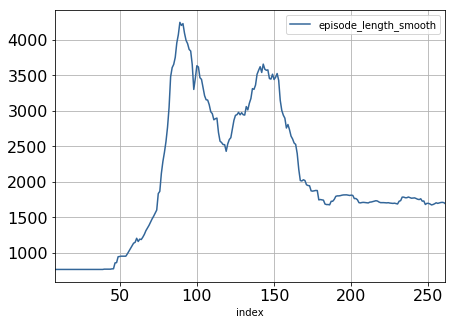

In [4]:
df_episodes.plot(x='index', y='episode_length_smooth', figsize=(7, 5), color='#336699', grid=True, fontsize=16)
plt.savefig("episode_length_smooth.svg")

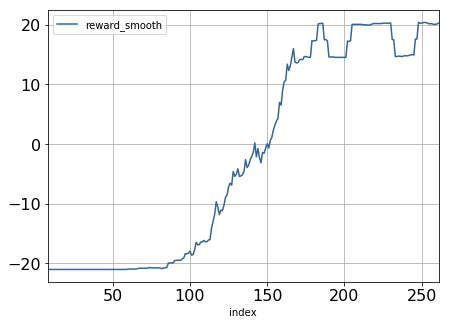

In [5]:
df_episodes.plot(x='index', y='reward_smooth', figsize=(7, 5), color='#336699', grid=True, fontsize=16)
plt.savefig("reward_smooth.svg")

/home/max/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


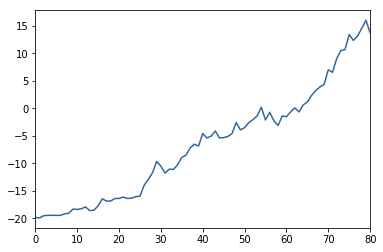

In [15]:
flatui = ["#336699"]
sns.set_palette(flatui)

# Load the long-form example gammas dataset
gammas = sns.load_dataset("gammas")

# Plot the response with standard error
sns.tsplot(data=df_episodes["reward_smooth"], estimator=np.median)